# Imbalanced Data
In simple terms, an unbalanced dataset is one in which the target variable has more observations in one specific class than the others.

![title](images/Imbalanced_Data.png)

## The Metric Problem
Most beginners struggle when dealing with imbalanced datasets for the first time. They tend to use accuracy as a metric to evaluate their machine learning models. This intuitively makes sense, as classification accuracy is often the first measure we use when evaluating such models.

Nevertheless, this can be misleading, because most of the algorithms we use are designed to achieve the best accuracy, so the classifier always “predicts” the most common class without performing any features analysis. It will still have a high accuracy rate, but it will give false predictions, nevertheless.

## Investigate your dataset

0    284315
1       492
Name: Class, dtype: int64


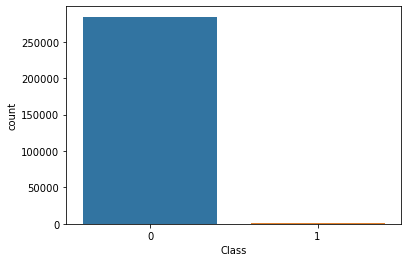

In [44]:
import pandas as pd
import seaborn as sns


# read the dataset
data = pd.read_csv('creditcard.csv')

# print the count of each class from the target variables
print(data.Class.value_counts())

# plot the count of each class from the target variables
sns.countplot(data.Class)

# Resampling
There are multiple ways to handle the issue of imbalanced datasets. The techniques we’re going to use in this tutorials is called resampling.

Resampling is a widely-adopted technique for dealing with imbalanced datasets, and it is often very easy to implement, fast to run, and an excellent starting point.

Resampling changes the dataset into a more balanced one by adding instances to the minority class or deleting ones from the majority class, that way we build better machine learning models.

The way to introduce these changes in a given dataset is achieved via two main methods: Oversampling and Undersampling.

## Oversampling
This method adds copies of instances from the under-represented class (minority class) to obtain a balanced dataset. 

![title](images/Oversampling.png)

## Undersampling
These methods simply delete instances from the over-represented class (majority class) in different ways. The most obvious way is to do delete instances randomly.

![title](images/Undersampling.png)

## Disadvantages
- If you duplicate random records from the minority class to do oversampling, this will cause overfitting.
- By undersampling and removing random records from the majority class, you risk losing some important information for the machine learning algorithm to use while training and predicting.

# Prepare Data, Classifier, and ROC AUC Curve

In [45]:
from sklearn.model_selection import train_test_split

# get the data and labels - for later use
x = data.drop(columns=['Class'])
y = data['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristics (ROC) Curve')
    plt.legend()
    plt.show()
    
def apply_classifier_with(resampling_method):
    
    # apply the re-sampling method
    resampled_x_train, resampled_y_train = resampling_method.fit_sample(x_train, y_train)
    print(f'x_train: {len(x_train)}')
    print(f'resampled_x_train: {len(resampled_x_train)}')
    
    # initialize the classifier
    random_forest = RandomForestClassifier(n_estimators=10, max_leaf_nodes=6, random_state=1)
    
    # fit the model
    random_forest.fit(resampled_x_train, resampled_y_train)
    
    # predict the outcome
    y_predict = random_forest.predict(x_test)
    
    # get the accuracy score
    print(f'accuracy_score: {accuracy_score(y_test, y_predict)}')
    
    # get the probabilities
    probs = random_forest.predict_proba(x_test) # 2D array of each model's probability 
    needed_probs = probs[:, 1] # 2nd column probability is considered as the prediction
    
    # get the auc score
    auc_score = roc_auc_score(y_test, needed_probs)
    print('AUC: %.2f' % auc_score)
    
    fpr, tpr, thresholds = roc_curve(y_test, needed_probs)
    plot_roc_curve(fpr, tpr)
    

# Oversampling Methods

## Random Oversampling
Random oversampling randomly duplicate records from the minority class. Try this technique when you don’t have a lot of data.

Random oversampling simply replicates random minority class examples. It’s known to increase the likelihood of overfitting, which is a major drawback.

x_train: 227845
resampled_x_train: 454880
accuracy_score: 0.9874126610722939
AUC: 0.98


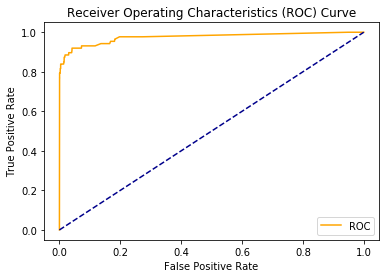

In [47]:
from imblearn.over_sampling import RandomOverSampler

# initialize the re-sampling method
over_sampler = RandomOverSampler()

# apply the classifier with it
apply_classifier_with(over_sampler)

## SMOTE Oversampling
SMOTE stands for Synthetic Minority Oversampling Technique — it consists of creating or synthesizing elements or samples from the minority class rather than creating copies based on those that exist already. This is used to avoid model overfitting.

To create a synthetic instance, SMOTE finds the K-nearest neighbors of each minority instance, randomly selects one of them and then calculates linear interpolations to produce a new minority instance in the neighborhood. It can be also explained by changing this instance features one at a time by a random amount — so as a result, the new points are added between the neighbors.

![title](images/SMOTE.png)

x_train: 227845
resampled_x_train: 454880
accuracy_score: 0.9922053298690355
AUC: 0.98


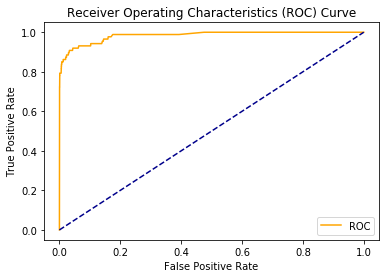

In [48]:
from imblearn.over_sampling import SMOTE

# initialize the re-sampling method
smote = SMOTE(sampling_strategy='minority')

# apply the classifier with it
apply_classifier_with(smote)


## ADASYN  Oversampling
ADASYN stands for Adaptive Synthetic sampling, and as SMOTE does, ADASYN generates samples of the minority class. But here, because of their density distributions, this technique receives wide attention.

Its purpose is to generate data for minority class samples that are harder to learn, as compared to those minority samples that are easier to learn.

It measures the K-nearest neighbors for all minority instances, then calculates the class ratio of the minority and majority instances to create new samples.

Repeating this process, we will adaptively shift the decision boundary to focus on those samples that are hard to learn.

x_train: 227845
resampled_x_train: 454726
accuracy_score: 0.9913451072644921
AUC: 0.98


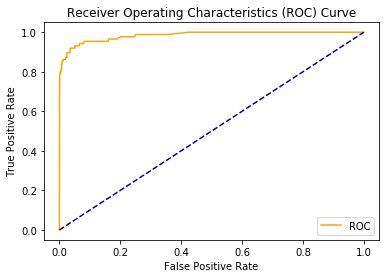

In [49]:
from imblearn.over_sampling import ADASYN

# initialize the re-sampling method
adasyn = ADASYN(sampling_strategy='minority')

# apply the classifier with it
apply_classifier_with(adasyn)

# Undersampling Methods

## Random Undersampling
Random undersampling randomly deletes records from the majority class. You should consider trying this technique when you have a lot of data.

A simple undersampling technique is to undersample the majority class randomly and uniformly. This can potentially lead to information loss, though. But if the examples of the majority class are near to others in terms of distance, this method might yield good results.

x_train: 227845
resampled_x_train: 810
accuracy_score: 0.9810399915733296
AUC: 0.97


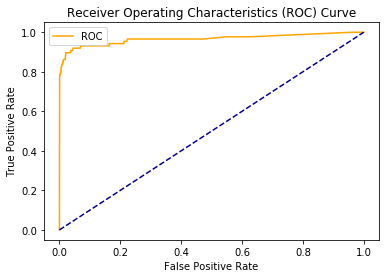

In [50]:
from imblearn.under_sampling  import RandomUnderSampler

# initialize the re-sampling method
under_sampler = RandomUnderSampler()

# apply the classifier with it
apply_classifier_with(under_sampler)

## NearMiss Undersampling
The NearMiss algorithm has been proposed to solve the issue of potential information loss. It’s based on the nearest neighbor algorithm and has a lot of variations.

The basics of the NearMiss algorithms include the following:
- The method starts by calculating the distances between all instances of the majority class and the instances of the minority class.
- Then k instances of the majority class that have the smallest distances to those in the minority class are selected to be retained.
- If there are n instances in the minority class, NearMiss will result in k × n instances of the majority class.

Here are the different versions of this algorithm:
- NearMiss-1 chooses instances of the majority class where their average distances to the three closest instances of the minority class are the smallest.
- NearMiss-2 uses the three farthest samples of the minority class.
- NearMiss-3 picks a given number of the closest samples of the majority class for each sample of the minority class.

Parameters:
- version = 1 or 2 or 3 ==> changes the version of the method.
- n_neighbors = <int>, default=3 ==> set the k neighbors for KNN.

![title](images/NearMiss.png)

x_train: 227845
resampled_x_train: 810
accuracy_score: 0.9761068782697236
AUC: 0.95


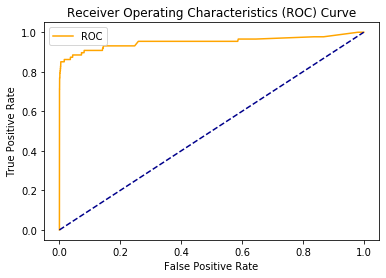

In [51]:
from imblearn.under_sampling  import NearMiss

# initialize the re-sampling method
nearMiss = NearMiss(sampling_strategy="not minority")

# apply the classifier with it
apply_classifier_with(nearMiss)

## TomekLinks Undersampling
Tomek links are pairs of very close instances that belong to different classes. They’re samples near the borderline between classes. By removing the examples of the majority class of each pair, we increase the space between the two classes and move toward balancing the dataset by deleting those points.

![title](images/TomekLinks.png)

x_train: 227845
resampled_x_train: 227785
accuracy_score: 0.9992802219023208
AUC: 0.89


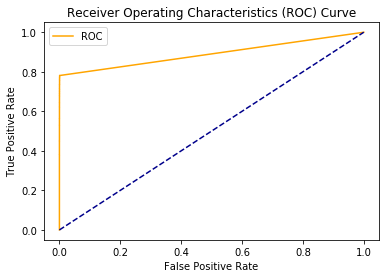

In [52]:
from imblearn.under_sampling  import TomekLinks

# initialize the re-sampling method
tomek_links  = TomekLinks(sampling_strategy="majority")

# apply the classifier with it
apply_classifier_with(tomek_links)

## ClusterCentroids Undersampling
The idea here is basically to remove the unimportant instance from the majority class. To decide whether an instance is important or not, we use the concept of clustering on the geometry of the feature space.

Clustering is an unsupervised learning approach, in which clusters are creating encircling data points belonging.

We will use it only to find cluster centroid that are obtained by averaging feature vector for all the features over the data points.

After finding the cluster centroid of the majority class, we decide the following:
- The instance belonging to the cluster (majority class), which is farthest from the cluster centroid in the feature space, is considered to be the most unimportant instance.
- The instance belonging to the majority class, which is nearest to the cluster centroid in the feature space, is considered to be the most important instance.

Parameters:
- estimator: An object that performs the clustering process for this method—K-Means is the default here.

![title](images/Cluster_Centroids.png)

x_train: 227845
resampled_x_train: 810
accuracy_score: 0.16816474140655174
AUC: 0.91


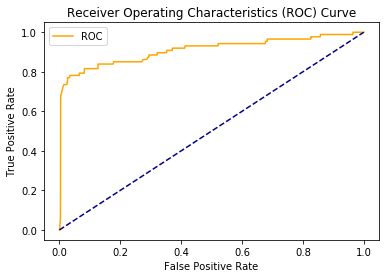

In [53]:
from imblearn.under_sampling  import ClusterCentroids

# initialize the re-sampling method
cluster_centroids  = ClusterCentroids(sampling_strategy="auto")

# apply the classifier with it
apply_classifier_with(cluster_centroids)

## Edited Nearest Neighbor Rule Undersampling
Edited Nearest Neighbor Rule (or ENN) was proposed in 1972 to remove instances from the majority class (undersampling).

This technique removes any instance from the majority class whose class label is different from the class label of at least two of its three nearest neighbors. In general terms, it’s near or around the borderline of different classes.

The point here is to increase the classification accuracy of minority instances rather than majority instances.

x_train: 227845
resampled_x_train: 227483
accuracy_score: 0.9992451107756047
AUC: 0.89


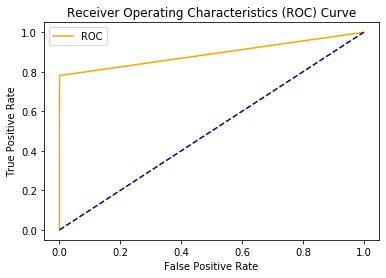

In [54]:
from imblearn.under_sampling  import EditedNearestNeighbours

# initialize the re-sampling method
enn = EditedNearestNeighbours(sampling_strategy="majority")

# apply the classifier with it
apply_classifier_with(enn)

## Neighborhood Cleaning Rule Undersampling
Neighborhood Cleaning Rule ( or NCR) deals with the majority and minority samples separately when sampling the datasets.

NCR starts by calculating the nearest three neighbors for all instances in the training set. We then do the following:
- If the instance belongs to the majority class and the classification given by its three nearest neighbors is the opposite of the class of the chosen instance — then the chosen instance is removed.
- If the instance belongs to the minority class and it’s misclassified by its three nearest neighbors — then the nearest neighbors that belong to the majority class are removed.

x_train: 227845
resampled_x_train: 226822
accuracy_score: 0.9992626663389628
AUC: 0.89


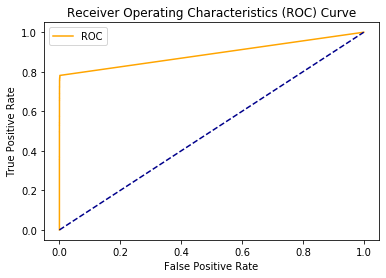

In [55]:
from imblearn.under_sampling  import NeighbourhoodCleaningRule

# initialize the re-sampling method
ncr = NeighbourhoodCleaningRule(sampling_strategy="majority")

# apply the classifier with it
apply_classifier_with(ncr)

# Combining Oversampling and Undersampling
We can combine oversampling and undersampling techniques to get better sampling results.

## SMOTE & Tomek Links

x_train: 227845
resampled_x_train: 453678
accuracy_score: 0.9922228854323936
AUC: 0.98


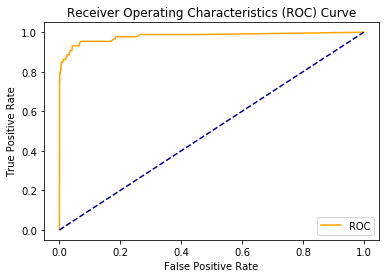

In [56]:
from imblearn.combine import SMOTETomek

# initialize the re-sampling method
smotemek = SMOTETomek(sampling_strategy='auto')

# apply the classifier with it
apply_classifier_with(smotemek)

## SMOTE & Edited Nearest Neighbor

x_train: 227845
resampled_x_train: 429025
accuracy_score: 0.9929777746567887
AUC: 0.98


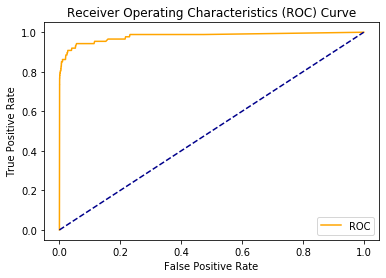

In [57]:
from imblearn.combine import SMOTEENN

# initialize the re-sampling method
smoenn = SMOTEENN(sampling_strategy='minority')

# apply the classifier with it
apply_classifier_with(smoenn)

# Other Techniques
Besides the resampling methodologies we’ve covered in this article, there are other intuitive and advanced techniques you can employ to deal with this problem. Here are some of them:
- Collect more data: You can always collect more data from other sources to build a more robust model.
- Changing the performance metric: We’ve seen that accuracy is misleading — it’s not the metric to use when dealing with imbalanced datasets. Some metrics have been designed for such a case, including: Confusion Matrix, Precision & Recall, F1 Score, ROC Curves.
- Use different algorithms: Some algorithms are better than others when dealing with imbalanced datasets. Generally, in machine learning, we test a variety of different types of algorithms on a given problem to see which ones provide better performance.
- Use penalized models: Some algorithms allow you to give them a different perspective on the problem. For instance, with some algorithms, we can add costs to force the model to pay attention to the minority class. There are penalized versions of algorithms such as penalized-SVM and logistic regression, even when using deep learning models throughout the class_weight attribute.
